In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np
from sklearn.metrics import f1_score
from tqdm import notebook

In [2]:
[predictions_list, labels_all_deg_seed, labels_all_simba_seed, labels_all_simba_seed2] = \
    np.load('/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/predictions_20seeds.npy', allow_pickle=True)
with open('/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/ALL_test_data.sav', 'rb') as fr:
    [data_test, targets_test] = joblib.load(fr)

In [3]:
micro_deg_other = []
micro_simba_other = []
micro_asoid_other = []

micro_deg = []
micro_simba = []
micro_asoid = []

macro_deg_other = []
macro_simba_other = []
macro_asoid_other = []

macro_deg = []
macro_simba = []
macro_asoid = []

weighted_deg_other = []
weighted_simba_other = []
weighted_asoid_other = []


f1_deg_other = []
f1_simba_other = []
f1_asoid_other = []

f1_deg = []
f1_simba = []
f1_asoid = []


for s in notebook.tqdm(range(len(labels_all_deg_seed))):

    micro_deg_other.append(f1_score(targets_test,
                              labels_all_deg_seed[s], average='micro'))
    micro_simba_other.append(f1_score(targets_test,
                                labels_all_simba_seed2[s], average='micro'))
    micro_asoid_other.append(f1_score(targets_test,
                                predictions_list[-1][s], average='micro'))

    micro_deg.append(f1_score(targets_test[(targets_test<3) & (labels_all_deg_seed[s]<3)],
                              labels_all_deg_seed[s][(targets_test<3) & (labels_all_deg_seed[s]<3)],
                              average='micro'))
    micro_simba.append(f1_score(targets_test[(targets_test<3) & (labels_all_simba_seed2[s]<3)],
                                labels_all_simba_seed2[s][(targets_test<3) & (labels_all_simba_seed2[s]<3)],
                                average='micro'))
    micro_asoid.append(f1_score(targets_test[(targets_test<3) & (predictions_list[-1][s]<3)],
                                predictions_list[-1][s][(targets_test<3) & (predictions_list[-1][s]<3)],
                                average='micro'))

    macro_deg_other.append(f1_score(targets_test,
                              labels_all_deg_seed[s], average='macro'))
    macro_simba_other.append(f1_score(targets_test,
                                labels_all_simba_seed2[s], average='macro'))
    macro_asoid_other.append(f1_score(targets_test,
                                predictions_list[-1][s], average='macro'))

    macro_deg.append(f1_score(targets_test[(targets_test<3) & (labels_all_deg_seed[s]<3)],
                              labels_all_deg_seed[s][(targets_test<3) & (labels_all_deg_seed[s]<3)],
                              average='macro'))
    macro_simba.append(f1_score(targets_test[(targets_test<3) & (labels_all_simba_seed2[s]<3)],
                                labels_all_simba_seed2[s][(targets_test<3) & (labels_all_simba_seed2[s]<3)],
                                average='macro'))
    macro_asoid.append(f1_score(targets_test[(targets_test<3) & (predictions_list[-1][s]<3)],
                                predictions_list[-1][s][(targets_test<3) & (predictions_list[-1][s]<3)],
                                average='macro'))


    weighted_deg_other.append(f1_score(targets_test,
                              labels_all_deg_seed[s], average='weighted'))
    weighted_simba_other.append(f1_score(targets_test,
                                labels_all_simba_seed2[s], average='weighted'))
    weighted_asoid_other.append(f1_score(targets_test,
                                predictions_list[-1][s], average='weighted'))


    f1_deg_other.append(f1_score(targets_test,
                              labels_all_deg_seed[s], average=None))
    f1_simba_other.append(f1_score(targets_test,
                                labels_all_simba_seed2[s], average=None))
    f1_asoid_other.append(f1_score(targets_test,
                                predictions_list[-1][s], average=None))

    f1_deg.append(f1_score(targets_test[(targets_test<3) & (labels_all_deg_seed[s]<3)],
                              labels_all_deg_seed[s][(targets_test<3) & (labels_all_deg_seed[s]<3)], average=None))
    f1_simba.append(f1_score(targets_test[(targets_test<3) & (labels_all_simba_seed2[s]<3)],
                                labels_all_simba_seed2[s][(targets_test<3) & (labels_all_simba_seed2[s]<3)], average=None))
    f1_asoid.append(f1_score(targets_test[(targets_test<3) & (predictions_list[-1][s]<3)],
                                predictions_list[-1][s][(targets_test<3) & (predictions_list[-1][s]<3)], average=None))

  0%|          | 0/20 [00:00<?, ?it/s]

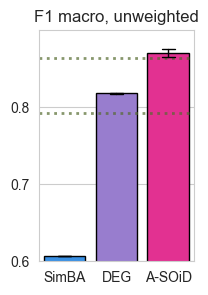

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(2, 3))
ax.set_title('F1 macro, unweighted')
ax.hlines(0.793, -.5, 2.5, ls=':', lw=2, color='darkolivegreen', alpha=0.7)
ax.hlines(0.864, -.5, 2.5, ls=':', lw=2, color='darkolivegreen', alpha=0.7)
sns.barplot([macro_simba, macro_deg, macro_asoid],
            estimator='median',
            capsize=.25,
            errorbar=('sd', 3),
            alpha=1,
            errcolor='k',
            errwidth=1,
            palette=['dodgerblue', 'mediumpurple', 'deeppink'],
            edgecolor='k',
            label=['SimBA', 'DEG', 'A-SOiD'],
            ax=ax)

ax.set_yticks(np.arange(0.6, 0.81, 0.1))
ax.set_xticklabels(['SimBA', 'DEG', 'A-SOiD'])
ax.set_ylim([0.6, 0.9])
plt.show()